# Problem Statement 1

## Importing Required Libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings("ignore")

## Loading the Datasets

In [ ]:
matches_path = "data/matches.csv"
deliveries_path = "data/deliveries.csv"

matches_df = pd.read_csv(matches_path)
deliveries_df = pd.read_csv(deliveries_path)

## Checking for missing values

In [ ]:
print("Dimensionality of Matches Dataset:")
print(matches_df.shape)
print("Missing Values in Matches Dataset:")
print(matches_df.isnull().sum())

print("\nDimensionality of Deliveries Dataset:")
print(deliveries_df.shape)
print("Missing Values in Deliveries Dataset:")
print(deliveries_df.isnull().sum())

Dimensionality of Matches Dataset:
(1095, 20)
Missing Values in Matches Dataset:
id                    0
season                0
city                 51
date                  0
match_type            0
player_of_match       5
venue                 0
team1                 0
team2                 0
toss_winner           0
toss_decision         0
winner                5
result                0
result_margin        19
target_runs           3
target_overs          3
super_over            0
method             1074
umpire1               0
umpire2               0
dtype: int64

Dimensionality of Deliveries Dataset:
(260920, 17)
Missing Values in Deliveries Dataset:
match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batter                   0
bowler                   0
non_striker              0
batsman_runs             0
extra_runs               0
total_runs               0
extras_type 

## Handling missing values in the dataset

In [ ]:
# For simplicity, let's fill missing values with a placeholder (e.g., 'Unknown' for categorical data, 0 for numerical data)
matches_df['city'].fillna('Unknown', inplace=True)
matches_df['winner'].fillna('No Result', inplace=True)
matches_df['method'].fillna('None', inplace=True)
matches_df['umpire1'].fillna('Unknown', inplace=True)
matches_df['umpire2'].fillna('Unknown', inplace=True)
matches_df['result_margin'].fillna(0, inplace=True)
matches_df['player_of_match'].fillna('None', inplace=True)
matches_df['target_runs'].fillna(0, inplace=True)
matches_df['target_overs'].fillna(0, inplace=True)

deliveries_df['player_dismissed'].fillna('None', inplace=True)
deliveries_df['dismissal_kind'].fillna('None', inplace=True)
deliveries_df['fielder'].fillna('None', inplace=True)
deliveries_df['extras_type'].fillna('None', inplace=True)

## Verifing that there are no missing values left

In [ ]:
print("Missing Values in Matches Dataset after handling:")
print(matches_df.isnull().sum())

print("\nMissing Values in Deliveries Dataset after handling:")
print(deliveries_df.isnull().sum())

Missing Values in Matches Dataset after handling:
id                 0
season             0
city               0
date               0
match_type         0
player_of_match    0
venue              0
team1              0
team2              0
toss_winner        0
toss_decision      0
winner             0
result             0
result_margin      0
target_runs        0
target_overs       0
super_over         0
method             0
umpire1            0
umpire2            0
dtype: int64

Missing Values in Deliveries Dataset after handling:
match_id            0
inning              0
batting_team        0
bowling_team        0
over                0
ball                0
batter              0
bowler              0
non_striker         0
batsman_runs        0
extra_runs          0
total_runs          0
extras_type         0
is_wicket           0
player_dismissed    0
dismissal_kind      0
fielder             0
dtype: int64


## Printing unique team names in the dataset

In [ ]:
print("Unique team names in matches dataset (team1):")
print(matches_df['team1'].unique())
print("\nUnique team names in matches dataset (team2):")
print(matches_df['team2'].unique())
print("\nUnique team names in matches dataset (winner):")
print(matches_df['winner'].unique())
print("\nUnique team names in matches dataset (toss_winner):")
print(matches_df['toss_winner'].unique())

print("\nUnique team names in deliveries dataset (batting_team):")
print(deliveries_df['batting_team'].unique())
print("\nUnique team names in deliveries dataset (bowling_team):")
print(deliveries_df['bowling_team'].unique())

Unique team names in matches dataset (team1):
['Royal Challengers Bangalore' 'Kings XI Punjab' 'Delhi Daredevils'
 'Mumbai Indians' 'Kolkata Knight Riders' 'Rajasthan Royals'
 'Deccan Chargers' 'Chennai Super Kings' 'Kochi Tuskers Kerala'
 'Pune Warriors' 'Sunrisers Hyderabad' 'Gujarat Lions'
 'Rising Pune Supergiants' 'Rising Pune Supergiant' 'Delhi Capitals'
 'Punjab Kings' 'Lucknow Super Giants' 'Gujarat Titans'
 'Royal Challengers Bengaluru']

Unique team names in matches dataset (team2):
['Kolkata Knight Riders' 'Chennai Super Kings' 'Rajasthan Royals'
 'Royal Challengers Bangalore' 'Deccan Chargers' 'Kings XI Punjab'
 'Delhi Daredevils' 'Mumbai Indians' 'Kochi Tuskers Kerala'
 'Pune Warriors' 'Sunrisers Hyderabad' 'Rising Pune Supergiants'
 'Gujarat Lions' 'Rising Pune Supergiant' 'Delhi Capitals' 'Punjab Kings'
 'Gujarat Titans' 'Lucknow Super Giants' 'Royal Challengers Bengaluru']

Unique team names in matches dataset (winner):
['Kolkata Knight Riders' 'Chennai Super Kings' 'De

## Mapping old team names to new team names

In [ ]:
team_name_mapping = {
    'Delhi Daredevils': 'Delhi Capitals',
    'Deccan Chargers': 'Sunrisers Hyderabad',
    'Rising Pune Supergiant': 'Rising Pune Supergiants',
    'Kings XI Punjab': 'Punjab Kings',
    'Royal Challengers Bangalore': 'Royal Challengers Bengaluru',
    'Gujarat Lions': 'Gujarat Titans',
}

# Apply the mapping to the matches dataset
matches_df['team1'] = matches_df['team1'].replace(team_name_mapping)
matches_df['team2'] = matches_df['team2'].replace(team_name_mapping)
matches_df['winner'] = matches_df['winner'].replace(team_name_mapping)
matches_df['toss_winner'] = matches_df['toss_winner'].replace(team_name_mapping)

# Apply the mapping to the deliveries dataset
deliveries_df['batting_team'] = deliveries_df['batting_team'].replace(team_name_mapping)
deliveries_df['bowling_team'] = deliveries_df['bowling_team'].replace(team_name_mapping)

# Verify the standardization
print("Unique team names in matches dataset (team1):")
print(matches_df['team1'].unique())
print("\nUnique team names in matches dataset (team2):")
print(matches_df['team2'].unique())
print("\nUnique team names in matches dataset (winner):")
print(matches_df['winner'].unique())
print("\nUnique team names in matches dataset (toss_winner):")
print(matches_df['toss_winner'].unique())

print("\nUnique team names in deliveries dataset (batting_team):")
print(deliveries_df['batting_team'].unique())
print("\nUnique team names in deliveries dataset (bowling_team):")
print(deliveries_df['bowling_team'].unique())

Unique team names in matches dataset (team1):
['Royal Challengers Bengaluru' 'Punjab Kings' 'Delhi Capitals'
 'Mumbai Indians' 'Kolkata Knight Riders' 'Rajasthan Royals'
 'Sunrisers Hyderabad' 'Chennai Super Kings' 'Kochi Tuskers Kerala'
 'Pune Warriors' 'Gujarat Titans' 'Rising Pune Supergiants'
 'Lucknow Super Giants']

Unique team names in matches dataset (team2):
['Kolkata Knight Riders' 'Chennai Super Kings' 'Rajasthan Royals'
 'Royal Challengers Bengaluru' 'Sunrisers Hyderabad' 'Punjab Kings'
 'Delhi Capitals' 'Mumbai Indians' 'Kochi Tuskers Kerala' 'Pune Warriors'
 'Rising Pune Supergiants' 'Gujarat Titans' 'Lucknow Super Giants']

Unique team names in matches dataset (winner):
['Kolkata Knight Riders' 'Chennai Super Kings' 'Delhi Capitals'
 'Royal Challengers Bengaluru' 'Rajasthan Royals' 'Punjab Kings'
 'Sunrisers Hyderabad' 'Mumbai Indians' 'Pune Warriors'
 'Kochi Tuskers Kerala' 'No Result' 'Rising Pune Supergiants'
 'Gujarat Titans' 'Lucknow Super Giants']

Unique team name

## Removing teams that are not playing IPL 2025

In [ ]:
active_teams = [
    'Chennai Super Kings', 'Delhi Capitals', 'Gujarat Titans', 'Kolkata Knight Riders',
    'Lucknow Super Giants', 'Mumbai Indians', 'Punjab Kings', 'Rajasthan Royals',
    'Royal Challengers Bengaluru', 'Sunrisers Hyderabad'
]

# Filter the matches dataset
matches_df = matches_df[
    matches_df['team1'].isin(active_teams) &
    matches_df['team2'].isin(active_teams) &
    matches_df['winner'].isin(active_teams) &
    matches_df['toss_winner'].isin(active_teams)
]

# Filter the deliveries dataset
deliveries_df = deliveries_df[
    deliveries_df['batting_team'].isin(active_teams) &
    deliveries_df['bowling_team'].isin(active_teams)
]

# Verify the filtering
print("Unique team names in matches dataset (team1):")
print(matches_df['team1'].unique())
print("\nUnique team names in matches dataset (team2):")
print(matches_df['team2'].unique())
print("\nUnique team names in matches dataset (winner):")
print(matches_df['winner'].unique())
print("\nUnique team names in matches dataset (toss_winner):")
print(matches_df['toss_winner'].unique())

print("\nUnique team names in deliveries dataset (batting_team):")
print(deliveries_df['batting_team'].unique())
print("\nUnique team names in deliveries dataset (bowling_team):")
print(deliveries_df['bowling_team'].unique())

Unique team names in matches dataset (team1):
['Royal Challengers Bengaluru' 'Punjab Kings' 'Delhi Capitals'
 'Mumbai Indians' 'Kolkata Knight Riders' 'Rajasthan Royals'
 'Sunrisers Hyderabad' 'Chennai Super Kings' 'Gujarat Titans'
 'Lucknow Super Giants']

Unique team names in matches dataset (team2):
['Kolkata Knight Riders' 'Chennai Super Kings' 'Rajasthan Royals'
 'Royal Challengers Bengaluru' 'Sunrisers Hyderabad' 'Punjab Kings'
 'Delhi Capitals' 'Mumbai Indians' 'Gujarat Titans' 'Lucknow Super Giants']

Unique team names in matches dataset (winner):
['Kolkata Knight Riders' 'Chennai Super Kings' 'Delhi Capitals'
 'Royal Challengers Bengaluru' 'Rajasthan Royals' 'Punjab Kings'
 'Sunrisers Hyderabad' 'Mumbai Indians' 'Gujarat Titans'
 'Lucknow Super Giants']

Unique team names in matches dataset (toss_winner):
['Royal Challengers Bengaluru' 'Chennai Super Kings' 'Rajasthan Royals'
 'Mumbai Indians' 'Sunrisers Hyderabad' 'Punjab Kings'
 'Kolkata Knight Riders' 'Delhi Capitals' 'Guja

## 🏏 Team Performance:

### Plotting Matches Played and Winning Percentages for each team

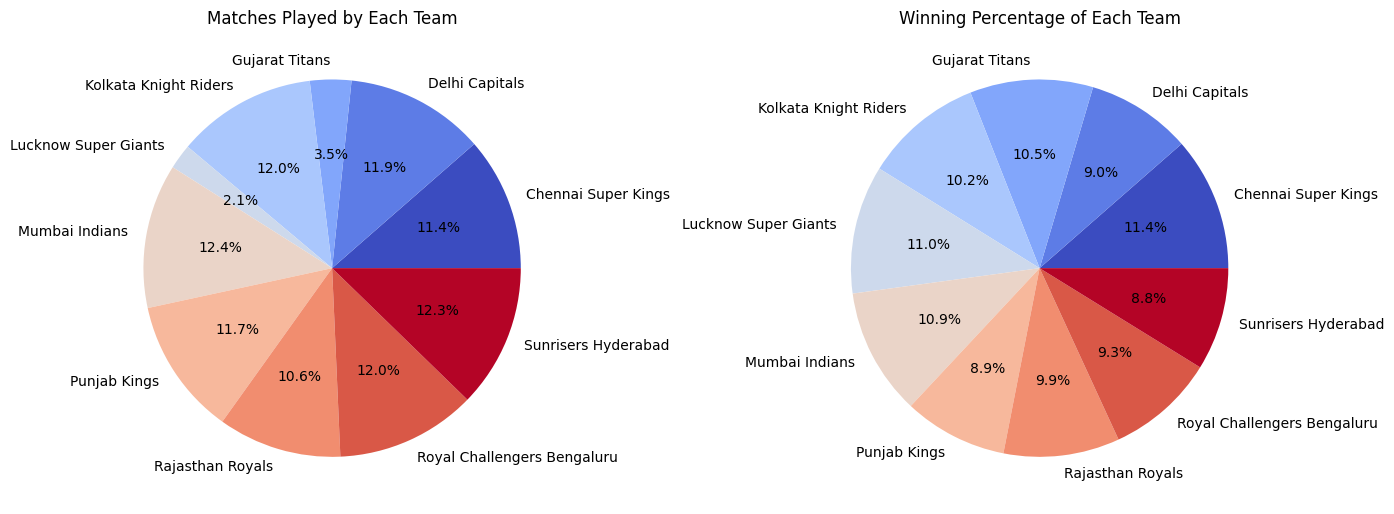

In [ ]:
# Calculate team performance
matches_played = matches_df['team1'].value_counts() + matches_df['team2'].value_counts()
matches_won = matches_df['winner'].value_counts()
winning_percentage = (matches_won / matches_played) * 100

# Create DataFrame
team_performance_df = pd.DataFrame({
    'Matches Played': matches_played,
    'Matches Won': matches_won,
    'Winning Percentage': winning_percentage
}).reset_index().rename(columns={'index': 'Team'})

# Fix NaN values (for teams with no wins)
team_performance_df.fillna(0, inplace=True)

# Generate colors dynamically
colors = plt.cm.coolwarm(np.linspace(0, 1, len(team_performance_df)))

# Plot Pie Charts
plt.figure(figsize=(14, 7))

# Pie Chart 1: Matches Played
plt.subplot(1, 2, 1)
plt.pie(team_performance_df['Matches Played'], labels=team_performance_df['Team'], autopct='%1.1f%%',
        colors=colors)
plt.title('Matches Played by Each Team')

# Pie Chart 2: Winning Percentage
plt.subplot(1, 2, 2)
plt.pie(team_performance_df['Winning Percentage'], labels=team_performance_df['Team'], autopct='%1.1f%%',
        colors=colors)
plt.title('Winning Percentage of Each Team')

plt.tight_layout()
plt.show()

### Plotting Run Rate and Economy Rate for each team

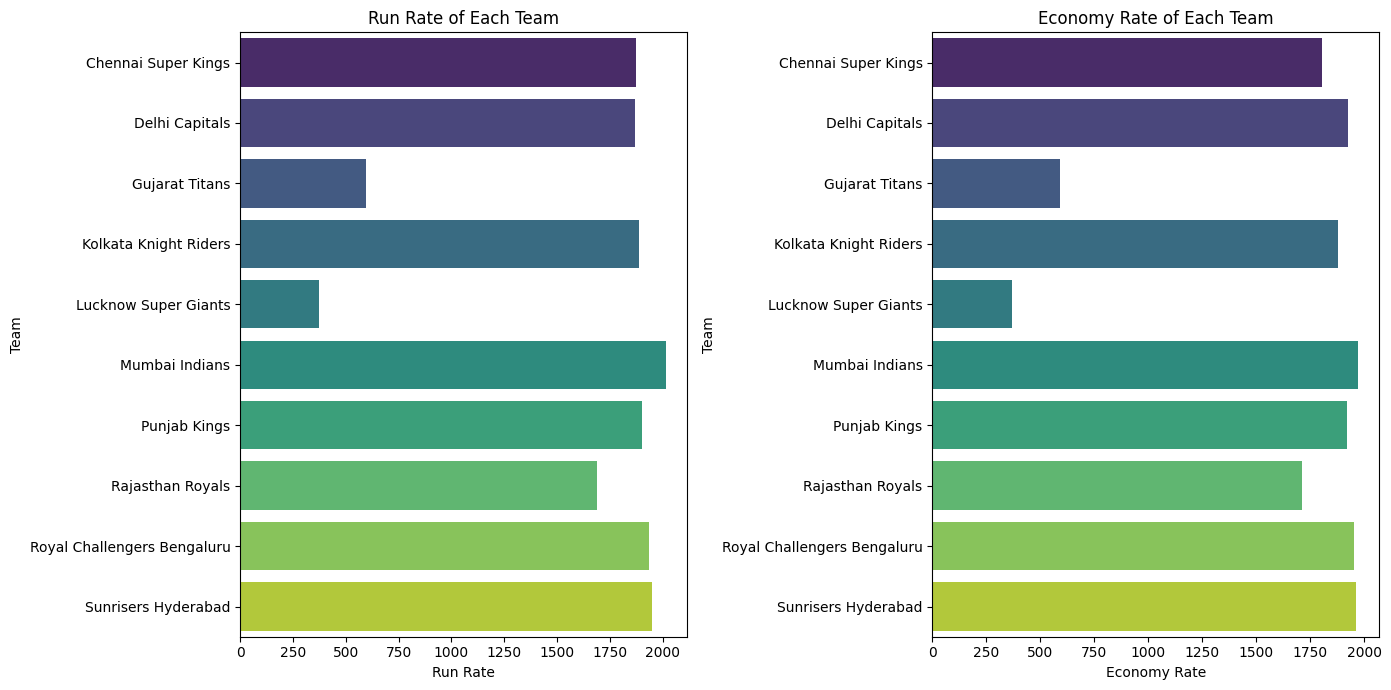

In [ ]:
team_runs = deliveries_df.groupby('batting_team')['total_runs'].sum()
team_overs = deliveries_df.groupby('batting_team')['over'].nunique()
team_run_rate = team_runs / team_overs

team_bowling_runs = deliveries_df.groupby('bowling_team')['total_runs'].sum()
team_bowling_overs = deliveries_df.groupby('bowling_team')['over'].nunique()
team_economy_rate = team_bowling_runs / team_bowling_overs

team_rate_df = pd.DataFrame({
    'Run Rate': team_run_rate,
    'Economy Rate': team_economy_rate
}).reset_index().rename(columns={'index': 'Team'})

plt.figure(figsize=(14, 7))
plt.subplot(1, 2, 1)
sns.barplot(x='Run Rate', y='Team', data=team_rate_df, palette='viridis')
plt.title('Run Rate of Each Team')
plt.xlabel('Run Rate')
plt.ylabel('Team')

plt.subplot(1, 2, 2)
sns.barplot(x='Economy Rate', y='Team', data=team_rate_df, palette='viridis')
plt.title('Economy Rate of Each Team')
plt.xlabel('Economy Rate')
plt.ylabel('Team')


plt.tight_layout()
plt.show()

### Plotting Highest and Lowest Scores of each team

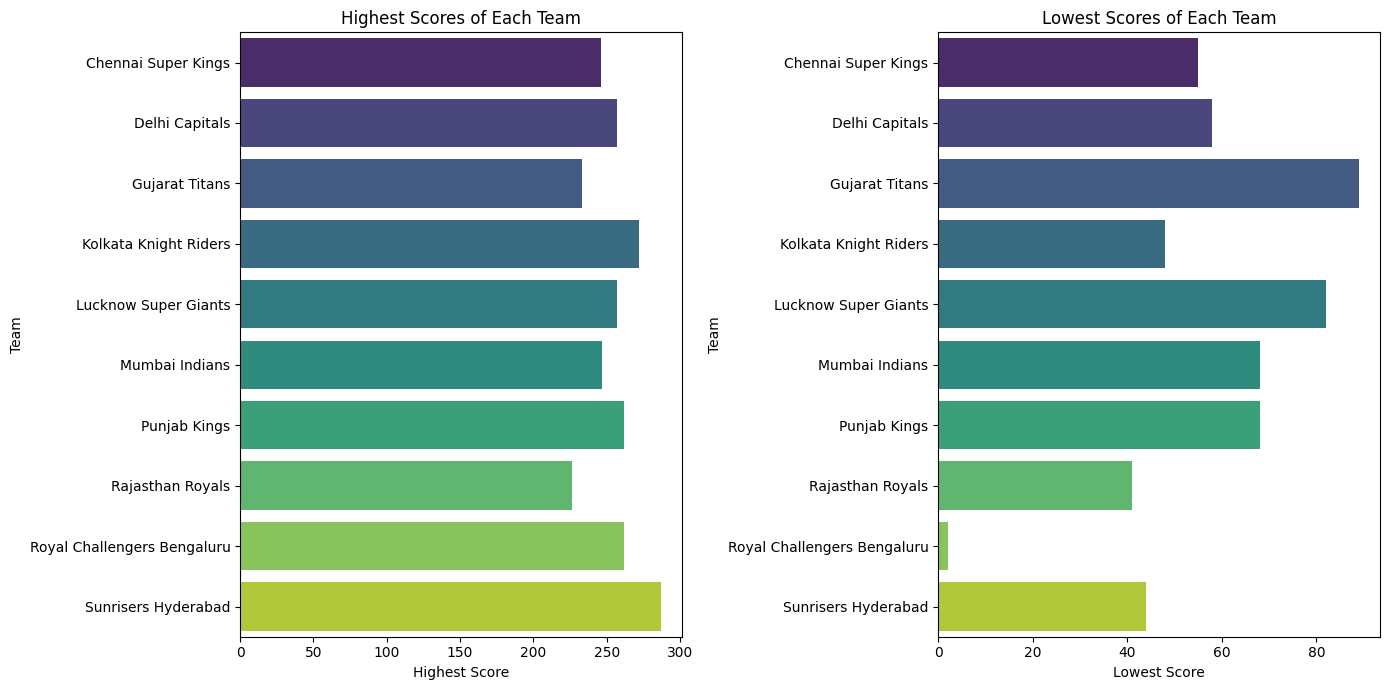

In [ ]:
highest_scores = deliveries_df.groupby(['match_id', 'batting_team'])['total_runs'].sum().reset_index()
highest_scores = highest_scores.groupby('batting_team')['total_runs'].max().reset_index().rename(columns={'total_runs': 'Highest Score'})

lowest_scores = deliveries_df.groupby(['match_id', 'batting_team'])['total_runs'].sum().reset_index()
lowest_scores = lowest_scores.groupby('batting_team')['total_runs'].min().reset_index().rename(columns={'total_runs': 'Lowest Score'})

# Merge highest and lowest scores into a single DataFrame
team_scores_df = pd.merge(highest_scores, lowest_scores, on='batting_team').rename(columns={'batting_team': 'Team'})

plt.figure(figsize=(14, 7))
plt.subplot(1, 2, 1)
sns.barplot(x='Highest Score', y='Team', data=team_scores_df, palette='viridis')
plt.title('Highest Scores of Each Team')
plt.xlabel('Highest Score')
plt.ylabel('Team')

plt.subplot(1, 2, 2)
sns.barplot(x='Lowest Score', y='Team', data=team_scores_df, palette='viridis')
plt.title('Lowest Scores of Each Team')
plt.xlabel('Lowest Score')
plt.ylabel('Team')


plt.tight_layout()
plt.show()

### Plotting Total 4s and 6s for each team

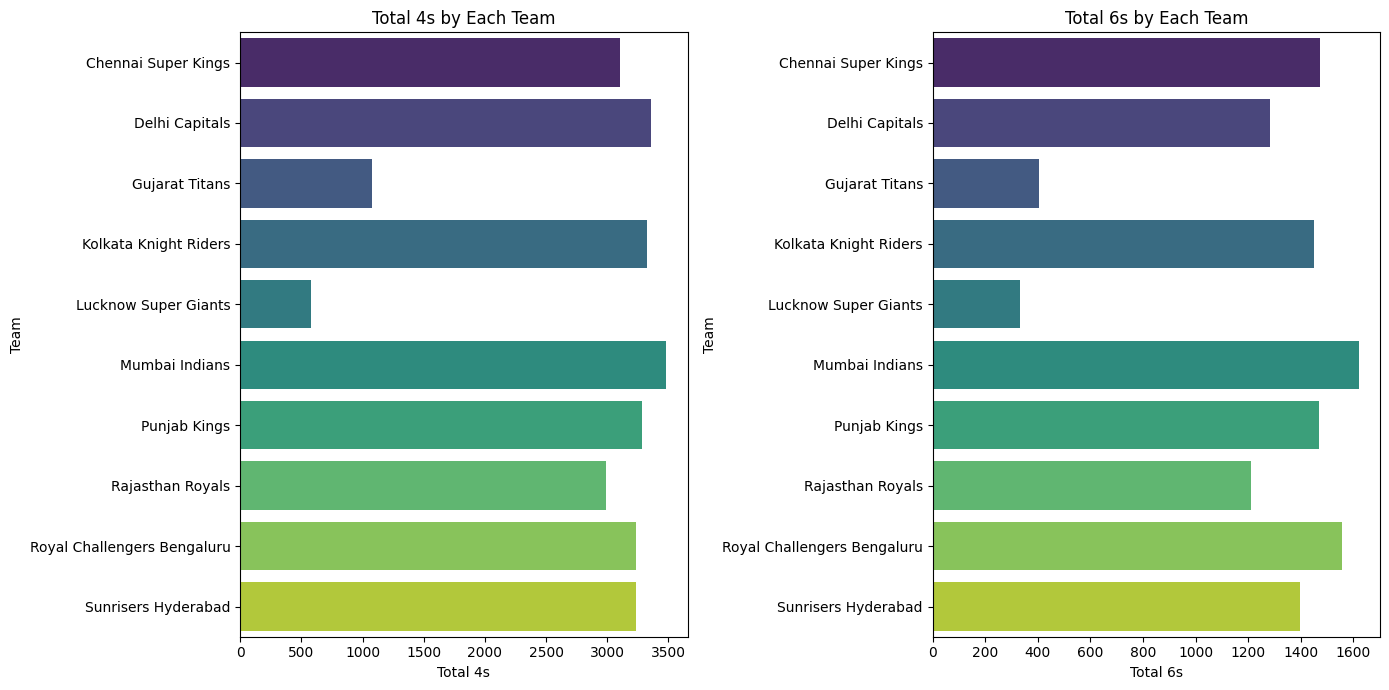

In [ ]:
total_fours = deliveries_df[deliveries_df['batsman_runs'] == 4].groupby('batting_team')['batsman_runs'].count().reset_index().rename(columns={'batsman_runs': 'Total 4s'})
total_sixes = deliveries_df[deliveries_df['batsman_runs'] == 6].groupby('batting_team')['batsman_runs'].count().reset_index().rename(columns={'batsman_runs': 'Total 6s'})

# Merge total 4s and 6s into a single DataFrame
team_boundaries_df = pd.merge(total_fours, total_sixes, on='batting_team').rename(columns={'batting_team': 'Team'})

plt.figure(figsize=(14, 7))
plt.subplot(1, 2, 1)
sns.barplot(x='Total 4s', y='Team', data=team_boundaries_df, palette='viridis')
plt.title('Total 4s by Each Team')
plt.xlabel('Total 4s')
plt.ylabel('Team')

plt.subplot(1, 2, 2)
sns.barplot(x='Total 6s', y='Team', data=team_boundaries_df, palette='viridis')
plt.title('Total 6s by Each Team')
plt.xlabel('Total 6s')
plt.ylabel('Team')


plt.tight_layout()
plt.show()

### Plotting Average Powerplay and Death Overs Score for each team

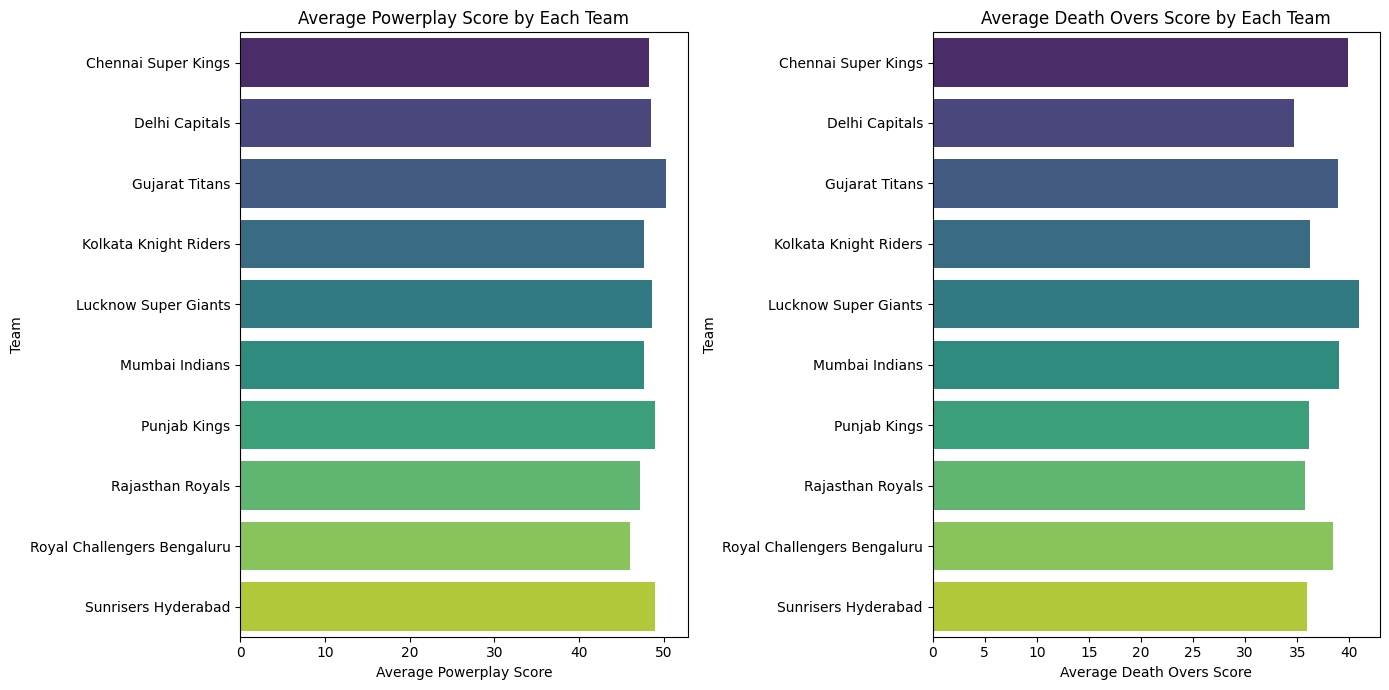

In [ ]:
powerplay_scores = deliveries_df[(deliveries_df['over'] >= 1) & (deliveries_df['over'] <= 6)].groupby(['match_id', 'batting_team'])['total_runs'].sum().reset_index()
death_overs_scores = deliveries_df[(deliveries_df['over'] >= 16) & (deliveries_df['over'] <= 20)].groupby(['match_id', 'batting_team'])['total_runs'].sum().reset_index()

average_powerplay_scores = powerplay_scores.groupby('batting_team')['total_runs'].mean().reset_index().rename(columns={'total_runs': 'Average Powerplay Score'})
average_death_overs_scores = death_overs_scores.groupby('batting_team')['total_runs'].mean().reset_index().rename(columns={'total_runs': 'Average Death Overs Score'})

# Merge average powerplay and death overs scores into a single DataFrame
team_overs_scores_df = pd.merge(average_powerplay_scores, average_death_overs_scores, on='batting_team').rename(columns={'batting_team': 'Team'})

plt.figure(figsize=(14, 7))
plt.subplot(1, 2, 1)
sns.barplot(x='Average Powerplay Score', y='Team', data=team_overs_scores_df, palette='viridis')
plt.title('Average Powerplay Score by Each Team')
plt.xlabel('Average Powerplay Score')
plt.ylabel('Team')

plt.subplot(1, 2, 2)
sns.barplot(x='Average Death Overs Score', y='Team', data=team_overs_scores_df, palette='viridis')
plt.title('Average Death Overs Score by Each Team')
plt.xlabel('Average Death Overs Score')
plt.ylabel('Team')


plt.tight_layout()
plt.show()

### Powerplay Analysis

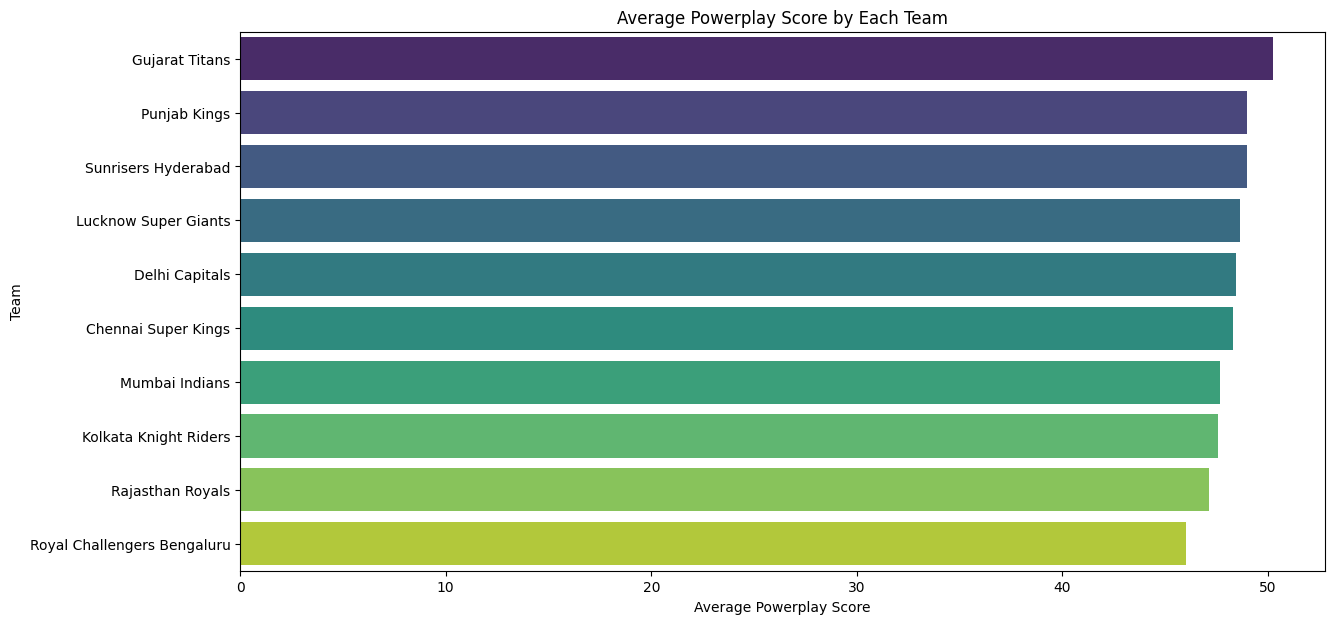

In [ ]:
# Calculate Powerplay Scores
powerplay_scores = deliveries_df[(deliveries_df['over'] >= 1) & (deliveries_df['over'] <= 6)].groupby(['match_id', 'batting_team'])['total_runs'].sum().reset_index()

# Calculate Average Powerplay Scores
average_powerplay_scores = powerplay_scores.groupby('batting_team')['total_runs'].mean().reset_index().rename(columns={'total_runs': 'Average Powerplay Score'})

# Rename columns for clarity
average_powerplay_scores = average_powerplay_scores.rename(columns={'batting_team': 'Team'})

# Plotting the average powerplay score for each team
plt.figure(figsize=(14, 7))
sns.barplot(x='Average Powerplay Score', y='Team', data=average_powerplay_scores.sort_values(by='Average Powerplay Score', ascending=False), palette='viridis')
plt.title('Average Powerplay Score by Each Team')
plt.xlabel('Average Powerplay Score')
plt.ylabel('Team')
plt.show()

## 👤 Player Performance:

### Top 20 run-scorers

In [ ]:
# Calculate total runs scored by each player
top_run_scorers = deliveries_df.groupby('batter')['batsman_runs'].sum().reset_index()

# Sort the players by total runs in descending order and get the top 20
top_20_run_scorers = top_run_scorers.sort_values(by='batsman_runs', ascending=False).head(20)

# Rename the columns
top_20_run_scorers = top_20_run_scorers.rename(columns={'batter': 'Batter', 'batsman_runs': 'Total Runs'})

# Reset the index
top_20_run_scorers = top_20_run_scorers.reset_index(drop=True)

print("Top 20 Run-Scorers in IPL:")
print(top_20_run_scorers)

Top 20 Run-Scorers in IPL:
            Batter  Total Runs
0          V Kohli        7565
1         S Dhawan        6546
2        DA Warner        6339
3        RG Sharma        6317
4         SK Raina        5239
5   AB de Villiers        4862
6         KL Rahul        4644
7       KD Karthik        4571
8         CH Gayle        4570
9         MS Dhoni        4511
10       SV Samson        4275
11    F du Plessis        4256
12       AT Rayudu        4137
13       G Gambhir        3935
14      RV Uthappa        3760
15       AM Rahane        3599
16       SR Watson        3595
17        SA Yadav        3504
18      JC Buttler        3501
19      KA Pollard        3331


### Plotting Batting Average vs Batting Strike Rate for the top 20 run-scorers

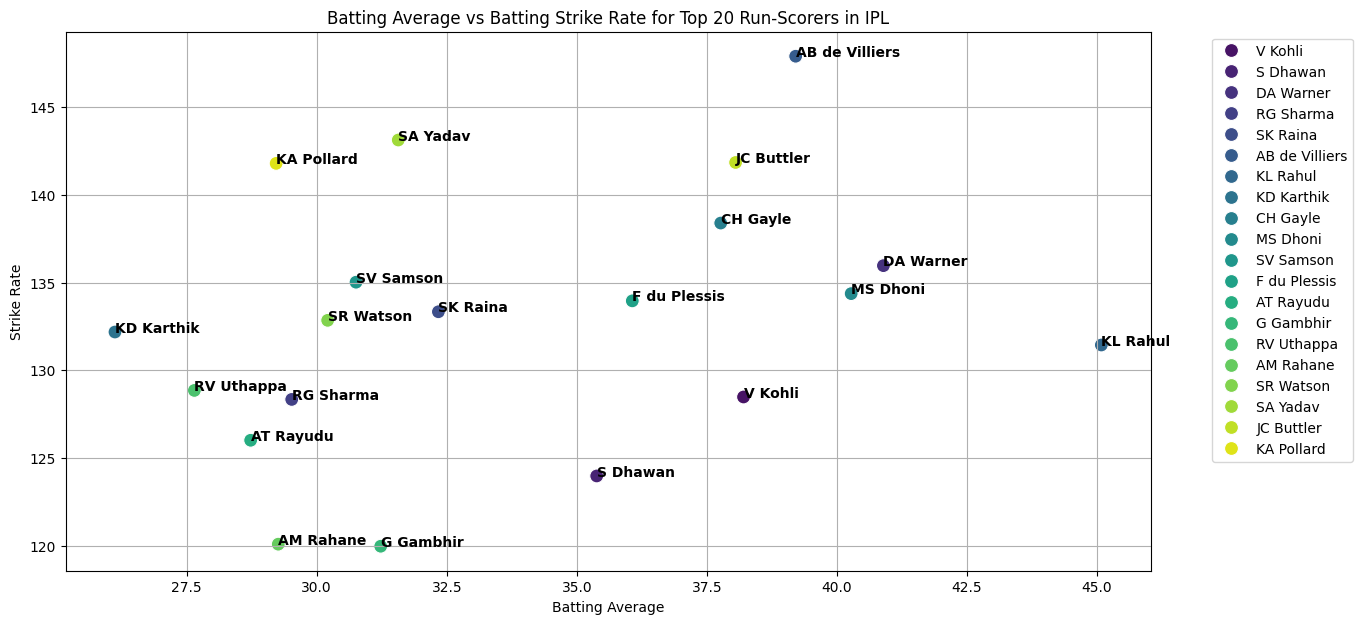

In [ ]:
# Calculate total runs scored by each player
total_runs = deliveries_df.groupby('batter')['batsman_runs'].sum().reset_index()

# Calculate total balls faced by each player
total_balls = deliveries_df.groupby('batter')['ball'].count().reset_index()

# Calculate total dismissals for each player
total_dismissals = deliveries_df[deliveries_df['is_wicket'] == 1].groupby('player_dismissed')['is_wicket'].count().reset_index()

# Merge total runs, total balls, and total dismissals into a single DataFrame
player_stats = pd.merge(total_runs, total_balls, on='batter')
player_stats = pd.merge(player_stats, total_dismissals, left_on='batter', right_on='player_dismissed', how='left').fillna(0)

# Calculate batting average and strike rate
player_stats['batting_average'] = player_stats['batsman_runs'] / player_stats['is_wicket']
player_stats['strike_rate'] = (player_stats['batsman_runs'] / player_stats['ball']) * 100

# Sort the players by total runs in descending order and get the top 20
top_20_run_scorers = player_stats.sort_values(by='batsman_runs', ascending=False).head(20)

# Plotting Batting Average vs Batting Strike Rate for the top 20 run-scorers
plt.figure(figsize=(14, 7))
scatter_plot = sns.scatterplot(x='batting_average', y='strike_rate', data=top_20_run_scorers, hue='batter', palette='viridis', s=100)

# Add labels to each point
for line in range(0, top_20_run_scorers.shape[0]):
    scatter_plot.text(top_20_run_scorers.batting_average.iloc[line], top_20_run_scorers.strike_rate.iloc[line],
                      top_20_run_scorers.batter.iloc[line], horizontalalignment='left', size='medium', color='black', weight='semibold')

plt.title('Batting Average vs Batting Strike Rate for Top 20 Run-Scorers in IPL')
plt.xlabel('Batting Average')
plt.ylabel('Strike Rate')
plt.grid(True)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

### Finding Highest Average and Strike Rate for players with >50 matches

In [ ]:
# Calculate total runs scored by each player
total_runs = deliveries_df.groupby('batter')['batsman_runs'].sum().reset_index()

# Calculate total balls faced by each player
total_balls = deliveries_df.groupby('batter')['ball'].count().reset_index()

# Calculate total dismissals for each player
total_dismissals = deliveries_df[deliveries_df['is_wicket'] == 1].groupby('player_dismissed')['is_wicket'].count().reset_index()

# Calculate total matches played by each player
total_matches = deliveries_df.groupby('batter')['match_id'].nunique().reset_index()

# Merge total runs, total balls, total dismissals, and total matches into a single DataFrame
player_stats = pd.merge(total_runs, total_balls, on='batter')
player_stats = pd.merge(player_stats, total_dismissals, left_on='batter', right_on='player_dismissed', how='left').fillna(0)
player_stats = pd.merge(player_stats, total_matches, on='batter')

# Rename columns for clarity
player_stats = player_stats.rename(columns={'batter': 'Batter', 'batsman_runs': 'Total Runs', 'ball': 'Total Balls', 'is_wicket': 'Total Dismissals', 'match_id': 'Total Matches'})

# Calculate batting average and strike rate
player_stats['Batting Average'] = player_stats['Total Runs'] / player_stats['Total Dismissals']
player_stats['Strike Rate'] = (player_stats['Total Runs'] / player_stats['Total Balls']) * 100

# Filter players with more than 50 matches
players_gt_50_matches = player_stats[player_stats['Total Matches'] > 50]

# Find the player with the highest batting average
highest_average_player = players_gt_50_matches.loc[players_gt_50_matches['Batting Average'].idxmax()]

# Find the player with the highest strike rate
highest_strike_rate_player = players_gt_50_matches.loc[players_gt_50_matches['Strike Rate'].idxmax()]

print("Player with the Highest Batting Average (more than 50 matches):")
print(highest_average_player[['Batter', 'Batting Average']])

print("\nPlayer with the Highest Strike Rate (more than 50 matches):")
print(highest_strike_rate_player[['Batter', 'Strike Rate']])

Player with the Highest Batting Average (more than 50 matches):
Batter              KL Rahul
Batting Average    45.087379
Name: 282, dtype: object

Player with the Highest Strike Rate (more than 50 matches):
Batter         AD Russell
Strike Rate    164.404524
Name: 38, dtype: object


### Plotting top wicket-takers

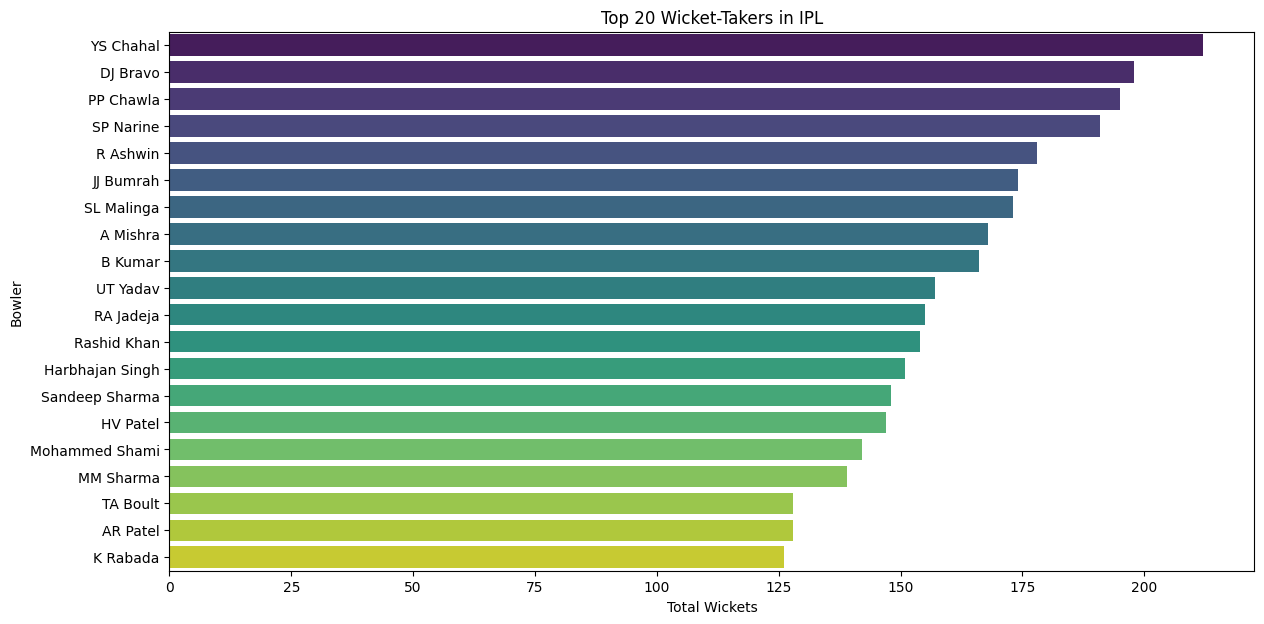

In [ ]:
# Calculate total wickets taken by each bowler
total_wickets = deliveries_df[deliveries_df['is_wicket'] == 1].groupby('bowler')['is_wicket'].count().reset_index()

# Sort the bowlers by total wickets in descending order and get the top 20
top_wicket_takers = total_wickets.sort_values(by='is_wicket', ascending=False).head(20)

# Rename the columns for clarity
top_wicket_takers = top_wicket_takers.rename(columns={'bowler': 'Bowler', 'is_wicket': 'Total Wickets'})

# Plotting the top wicket-takers
plt.figure(figsize=(14, 7))
sns.barplot(x='Total Wickets', y='Bowler', data=top_wicket_takers, palette='viridis')
plt.title('Top 20 Wicket-Takers in IPL')
plt.xlabel('Total Wickets')
plt.ylabel('Bowler')
plt.show()

### Plotting top highest individual scores

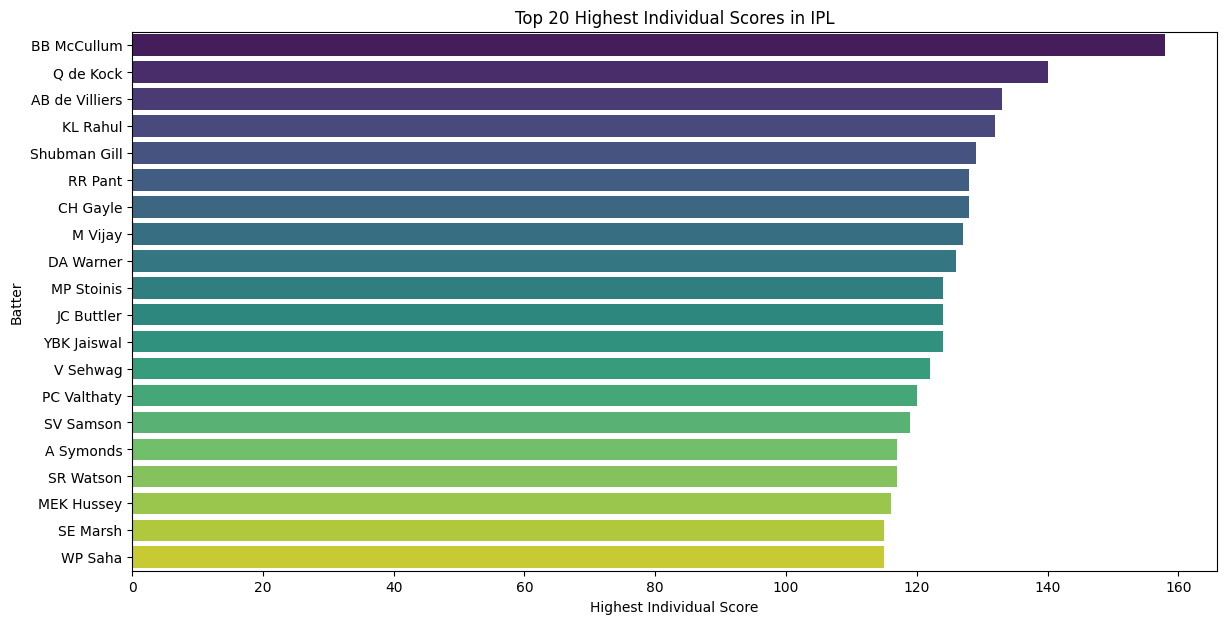

In [ ]:
# Calculate the highest individual scores by each player in a single match
highest_individual_scores = deliveries_df.groupby(['match_id', 'batter'])['batsman_runs'].sum().reset_index()

# Get the highest score for each player
highest_individual_scores = highest_individual_scores.groupby('batter')['batsman_runs'].max().reset_index()

# Sort the players by highest individual score in descending order and get the top 20
top_highest_individual_scores = highest_individual_scores.sort_values(by='batsman_runs', ascending=False).head(20)

# Rename the columns for clarity
top_highest_individual_scores = top_highest_individual_scores.rename(columns={'batter': 'Batter', 'batsman_runs': 'Highest Individual Score'})

# Plotting the top highest individual scores
plt.figure(figsize=(14, 7))
sns.barplot(x='Highest Individual Score', y='Batter', data=top_highest_individual_scores, palette='viridis')
plt.title('Top 20 Highest Individual Scores in IPL')
plt.xlabel('Highest Individual Score')
plt.ylabel('Batter')
plt.show()

### Man of the Match Count Analysis

Man of the Match DataFrame:
            Player  No. of matches
0   AB de Villiers              22
1         CH Gayle              18
2        RG Sharma              17
3        DA Warner              17
4          V Kohli              16
5        RA Jadeja              16
6       AD Russell              15
7        SR Watson              15
8        SP Narine              14
9       KA Pollard              14
10        MS Dhoni              14
11        SK Raina              14
12       YK Pathan              14
13      JC Buttler              13
14        KL Rahul              13
15       G Gambhir              12
16        S Dhawan              12
17     Rashid Khan              12
18      MEK Hussey              11
19      RD Gaikwad              11


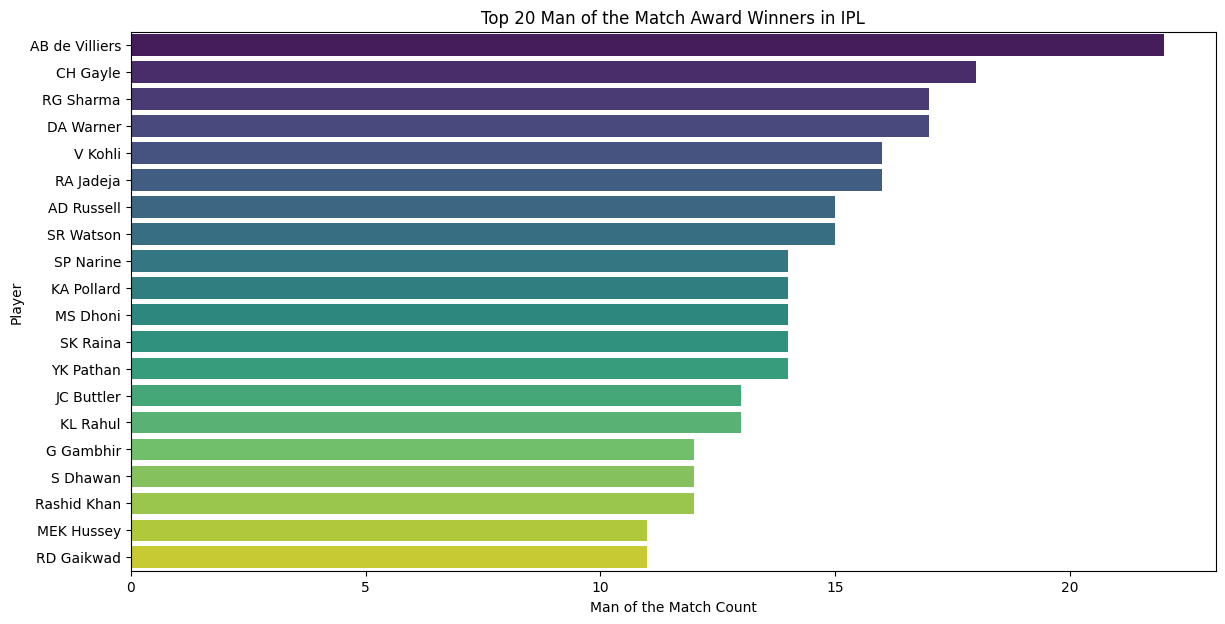

In [ ]:
# Calculate the number of Man of the Match awards won by each player
man_of_the_match_counts = matches_df['player_of_match'].value_counts().reset_index()
man_of_the_match_counts = man_of_the_match_counts.rename(columns={'player_of_match': 'Player', 'count': 'No. of matches'})

# Print the exact DataFrame to see column structure
print("Man of the Match DataFrame:")
print(man_of_the_match_counts.head(20))

# Plot using the actual column names without assuming what they are
plt.figure(figsize=(14, 7))
sns.barplot(
    x=man_of_the_match_counts.columns[1],  # Count column (second column)
    y=man_of_the_match_counts.columns[0],  # Player name column (first column)
    data=man_of_the_match_counts.head(20),
    palette='viridis'
)
plt.title('Top 20 Man of the Match Award Winners in IPL')
plt.xlabel('Man of the Match Count')
plt.ylabel('Player')
plt.show()

### Using K-Means Clustering to plot Batting Average vs Bowling Economy Rate for number of clusters = 3 (Batsman, Bowler, All Rounder)

Cluster centroids:
Cluster 0: Batting Avg = 8.29, Economy Rate = 8.02
Cluster 1: Batting Avg = 27.13, Economy Rate = 8.36
Cluster 2: Batting Avg = 10.91, Economy Rate = 10.91


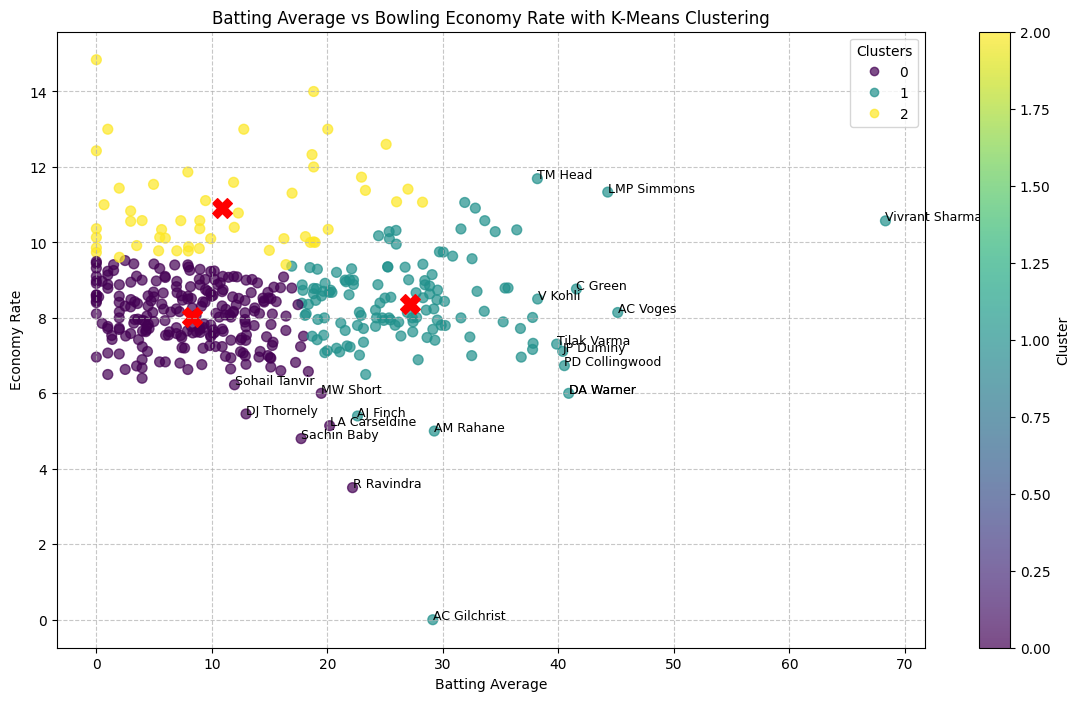

In [ ]:
# Calculate batting statistics for each player
# Total runs scored by each batsman
batting_runs = deliveries_df.groupby('batter')['batsman_runs'].sum().reset_index()

# Total dismissals for each batsman
batting_dismissals = deliveries_df[deliveries_df['is_wicket'] == 1].groupby('player_dismissed')['is_wicket'].count().reset_index()

# Merge runs and dismissals
batting_stats = pd.merge(batting_runs, batting_dismissals, left_on='batter', right_on='player_dismissed', how='left')
batting_stats = batting_stats.rename(columns={'batter': 'player', 'batsman_runs': 'total_runs', 'is_wicket': 'dismissals'})
batting_stats['dismissals'] = batting_stats['dismissals'].fillna(0)

# Calculate batting average (add small value to avoid division by zero)
batting_stats['batting_average'] = batting_stats['total_runs'] / (batting_stats['dismissals'] + 0.01)

# Calculate bowling statistics for each player
# Total runs conceded by each bowler
bowling_runs = deliveries_df.groupby('bowler')['total_runs'].sum().reset_index()

# Total balls bowled by each bowler
bowling_balls = deliveries_df.groupby('bowler')['ball'].count().reset_index()

# Merge runs and balls
bowling_stats = pd.merge(bowling_runs, bowling_balls, on='bowler')
bowling_stats = bowling_stats.rename(columns={'bowler': 'player', 'total_runs': 'runs_conceded', 'ball': 'balls_bowled'})

# Calculate economy rate (runs conceded per over)
bowling_stats['overs_bowled'] = bowling_stats['balls_bowled'] / 6
bowling_stats['economy_rate'] = bowling_stats['runs_conceded'] / bowling_stats['overs_bowled']

# Merge batting and bowling stats
player_stats = pd.merge(batting_stats[['player', 'batting_average']],
                        bowling_stats[['player', 'economy_rate']],
                        on='player',
                        how='inner')

# Filter out players with extreme values for better visualization
player_stats = player_stats[(player_stats['batting_average'] < 100) &
                           (player_stats['economy_rate'] < 15)]

# Apply K-means clustering
X = player_stats[['batting_average', 'economy_rate']].values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

kmeans = KMeans(n_clusters=3, random_state=42)
player_stats['cluster'] = kmeans.fit_predict(X_scaled)

# Define cluster labels
cluster_labels = {
    0: 'Cluster 0',
    1: 'Cluster 1',
    2: 'Cluster 2'
}

# We'll determine which is which based on centroid locations
centroids = scaler.inverse_transform(kmeans.cluster_centers_)
print("Cluster centroids:")
for i, centroid in enumerate(centroids):
    print(f"Cluster {i}: Batting Avg = {centroid[0]:.2f}, Economy Rate = {centroid[1]:.2f}")

# Assign meaningful labels based on centroid values (typically):
# High batting avg, high economy = Batsman
# Low batting avg, low economy = Bowler
# Medium batting avg, medium economy = All-Rounder
# But we'll check the actual centroids to confirm

# Plot the clusters
plt.figure(figsize=(14, 8))
scatter = plt.scatter(player_stats['batting_average'],
                     player_stats['economy_rate'],
                     c=player_stats['cluster'],
                     cmap='viridis',
                     s=50,
                     alpha=0.7)

# Add cluster centroids
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', s=200, label='Centroids')

# Add labels for interesting points (top players)
for i, player in enumerate(player_stats.nlargest(10, 'batting_average')['player']):
    plt.annotate(player,
                 (player_stats.loc[player_stats['player'] == player, 'batting_average'].values[0],
                  player_stats.loc[player_stats['player'] == player, 'economy_rate'].values[0]),
                 fontsize=9)

for i, player in enumerate(player_stats.nsmallest(10, 'economy_rate')['player']):
    plt.annotate(player,
                 (player_stats.loc[player_stats['player'] == player, 'batting_average'].values[0],
                  player_stats.loc[player_stats['player'] == player, 'economy_rate'].values[0]),
                 fontsize=9)

# Add legend
plt.legend(*scatter.legend_elements(), title="Clusters")
plt.title('Batting Average vs Bowling Economy Rate with K-Means Clustering')
plt.xlabel('Batting Average')
plt.ylabel('Economy Rate')
plt.grid(True, linestyle='--', alpha=0.7)
plt.colorbar(scatter, label='Cluster')
plt.show()

### Identifing top 10 batsmen in each category

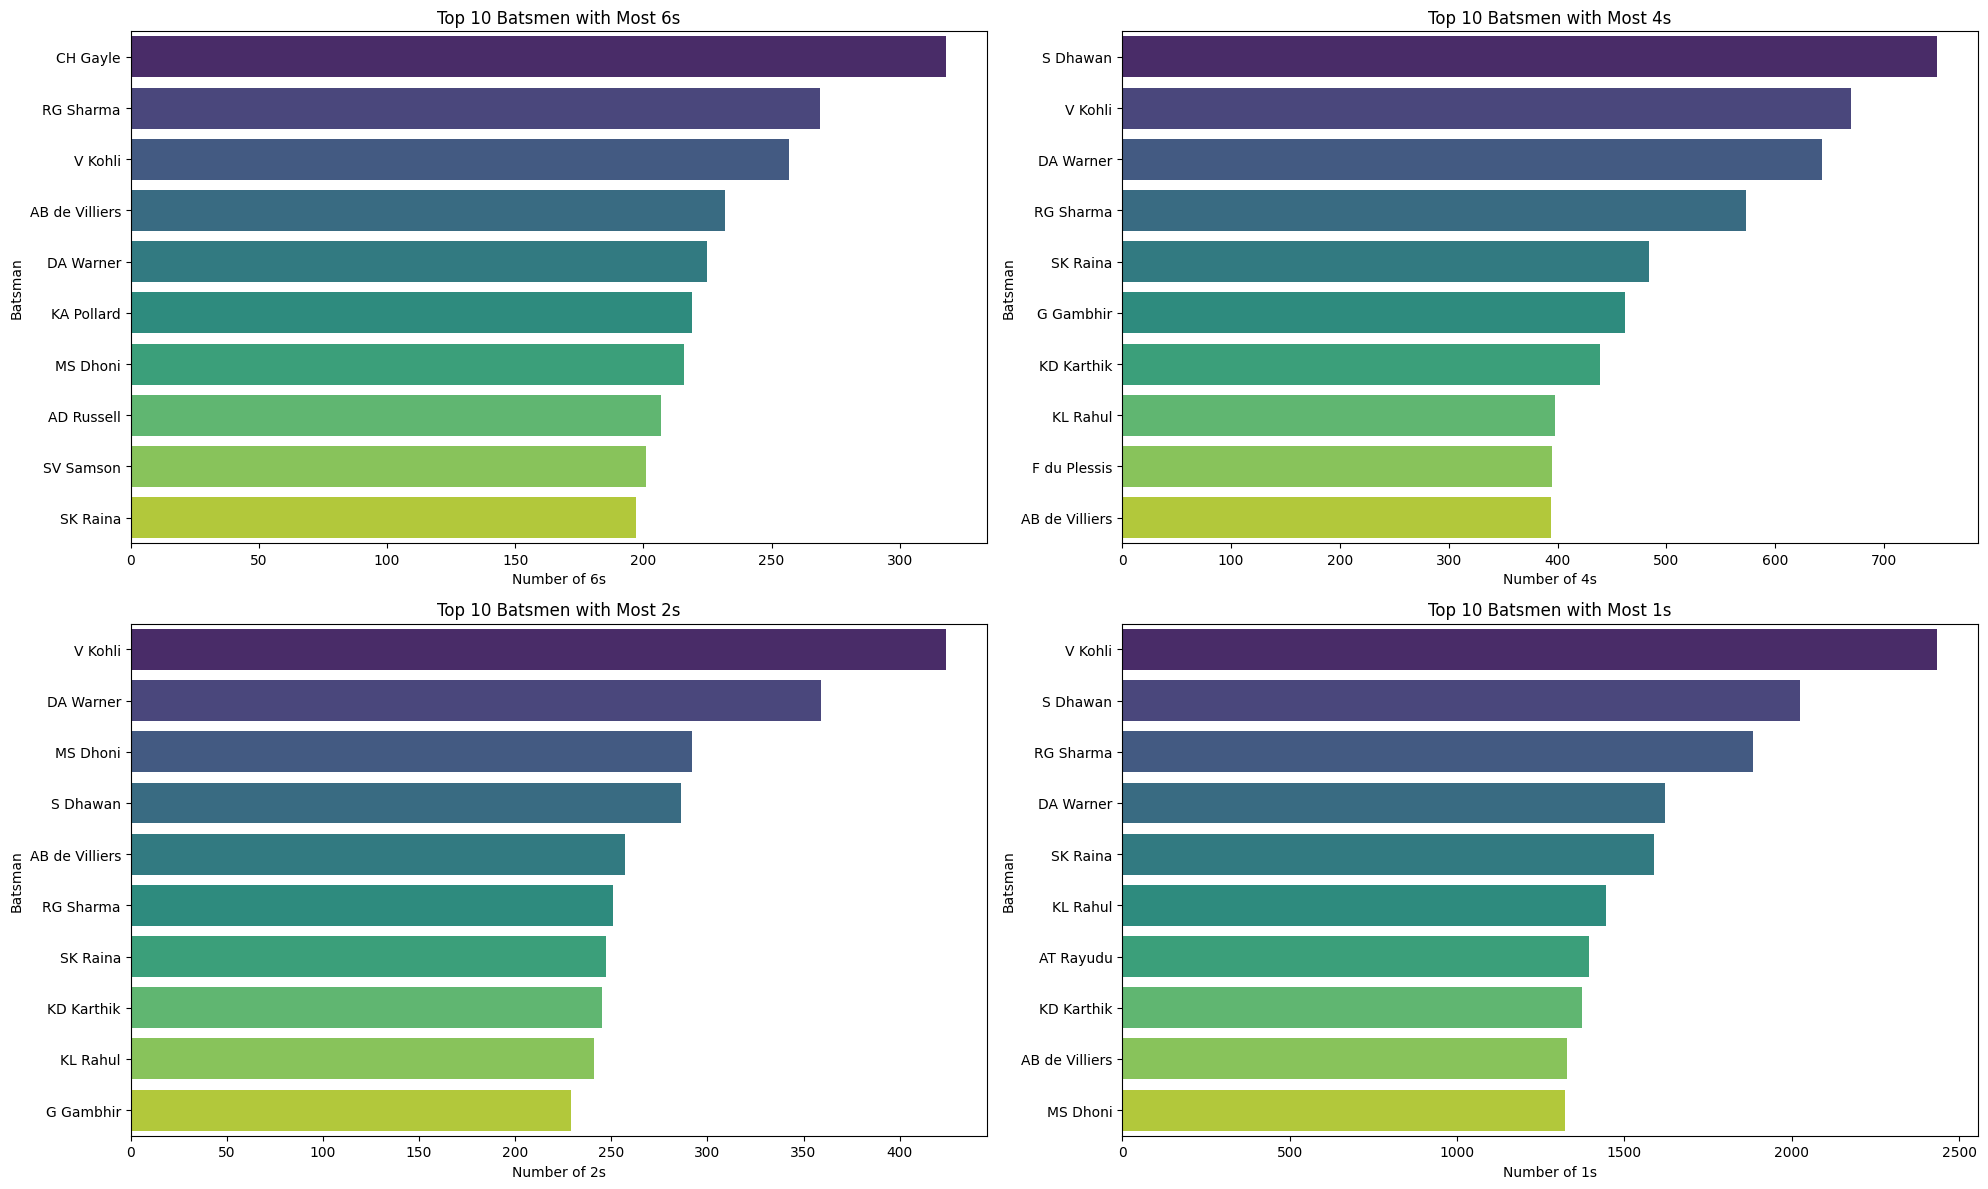

In [ ]:
# Create functions to get top batsmen for each run category
def get_top_scorers(df, run_value):
    # Filter deliveries by run value
    run_df = df[df['batsman_runs'] == run_value]

    # Count occurrences for each batsman
    batsmen_counts = run_df.groupby('batter')['batsman_runs'].count().reset_index()

    # Rename columns
    batsmen_counts = batsmen_counts.rename(columns={'batter': 'Batsman', 'batsman_runs': f'Number of {run_value}s'})

    # Sort and get top 10
    return batsmen_counts.sort_values(by=f'Number of {run_value}s', ascending=False).head(10)

# Get top 10 batsmen for each run category
top_six_hitters = get_top_scorers(deliveries_df, 6)
top_four_hitters = get_top_scorers(deliveries_df, 4)
top_two_scorers = get_top_scorers(deliveries_df, 2)
top_one_scorers = get_top_scorers(deliveries_df, 1)

# Create plots for each category
fig, axes = plt.subplots(2, 2, figsize=(20, 12))

# Plot Top 6's scorers
sns.barplot(x='Number of 6s', y='Batsman', data=top_six_hitters, palette='viridis', ax=axes[0, 0])
axes[0, 0].set_title('Top 10 Batsmen with Most 6s')
axes[0, 0].set_ylabel('Batsman')
axes[0, 0].set_xlabel('Number of 6s')

# Plot Top 4's scorers
sns.barplot(x='Number of 4s', y='Batsman', data=top_four_hitters, palette='viridis', ax=axes[0, 1])
axes[0, 1].set_title('Top 10 Batsmen with Most 4s')
axes[0, 1].set_ylabel('Batsman')
axes[0, 1].set_xlabel('Number of 4s')

# Plot Top 2's scorers
sns.barplot(x='Number of 2s', y='Batsman', data=top_two_scorers, palette='viridis', ax=axes[1, 0])
axes[1, 0].set_title('Top 10 Batsmen with Most 2s')
axes[1, 0].set_ylabel('Batsman')
axes[1, 0].set_xlabel('Number of 2s')

# Plot Top 1's scorers
sns.barplot(x='Number of 1s', y='Batsman', data=top_one_scorers, palette='viridis', ax=axes[1, 1])
axes[1, 1].set_title('Top 10 Batsmen with Most 1s')
axes[1, 1].set_ylabel('Batsman')
axes[1, 1].set_xlabel('Number of 1s')

plt.tight_layout()
plt.show()

## 📅 Seasonal Analysis:

### Calculating average runs per match per season

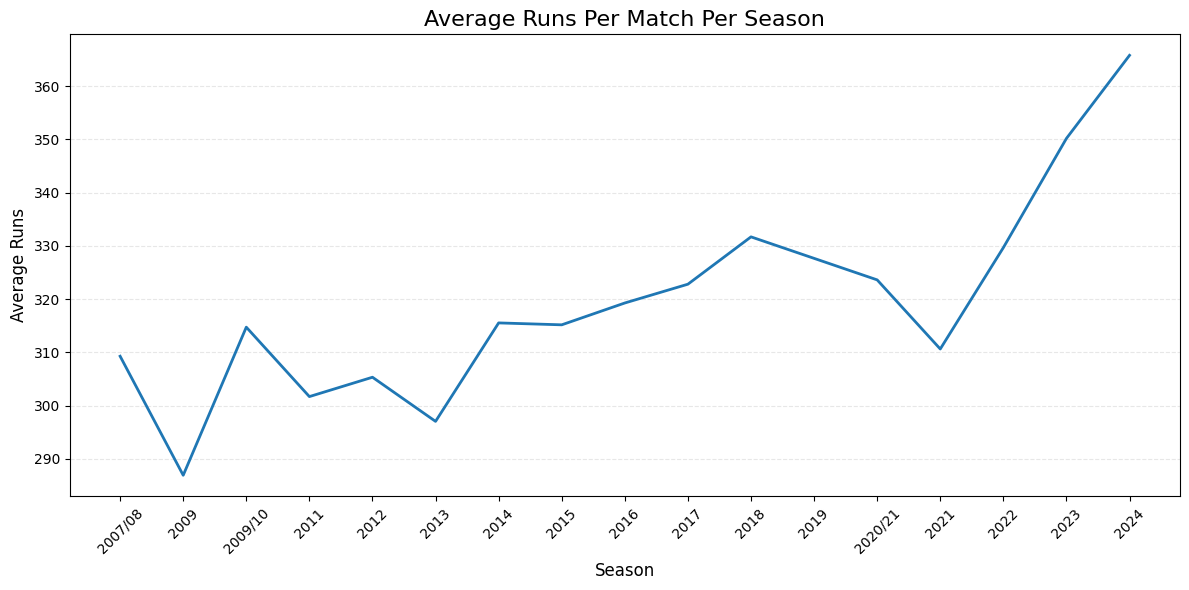

In [ ]:
# Calculate total runs scored in each match
match_runs = deliveries_df.groupby('match_id')['total_runs'].sum().reset_index()

# Merge with matches data to get season information
match_runs_season = match_runs.merge(matches_df[['id', 'season']], left_on='match_id', right_on='id')

# Calculate average runs per match per season
avg_runs_per_season = match_runs_season.groupby('season')['total_runs'].mean().reset_index()

# Visualize
plt.figure(figsize=(12, 6))
sns.lineplot(x='season', y='total_runs', data=avg_runs_per_season, palette='viridis', markers='o', linewidth=2)
plt.title('Average Runs Per Match Per Season', fontsize=16)
plt.xlabel('Season', fontsize=12)
plt.ylabel('Average Runs', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

### Identifing targets of 200+ runs per season

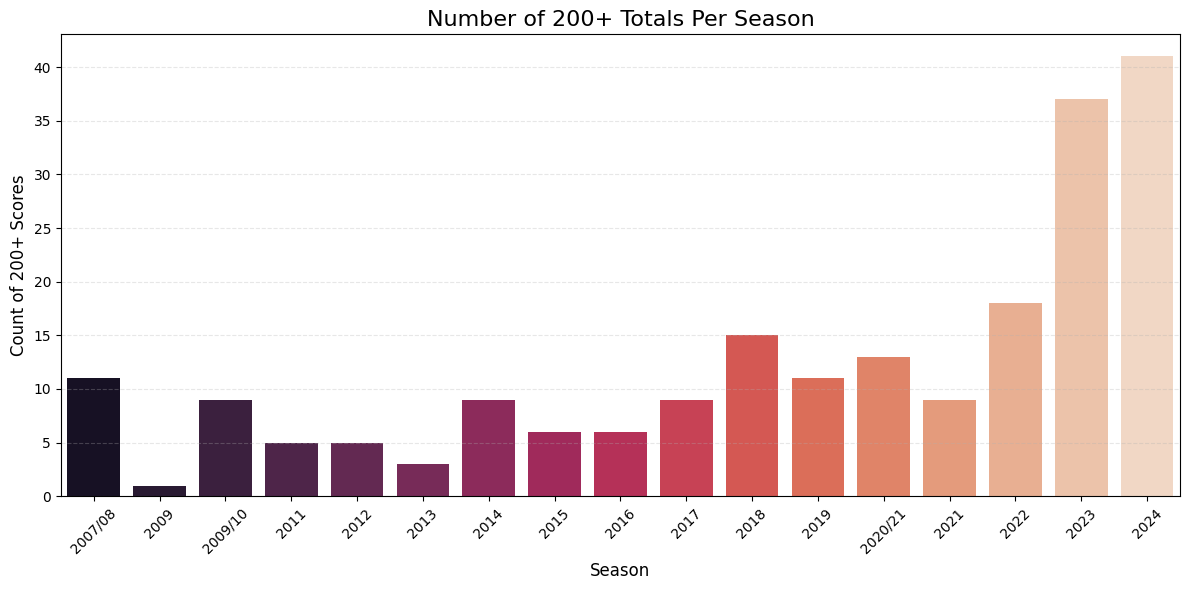

In [ ]:
# Calculate team innings total for each match
team_innings_total = deliveries_df.groupby(['match_id', 'inning', 'batting_team'])['total_runs'].sum().reset_index()

# Merge with matches data to get season information
team_innings_total_season = team_innings_total.merge(matches_df[['id', 'season']], left_on='match_id', right_on='id')

# Find innings with 200+ runs
high_scoring_innings = team_innings_total_season[team_innings_total_season['total_runs'] >= 200]

# Count 200+ totals per season
high_scores_per_season = high_scoring_innings.groupby('season').size().reset_index(name='count_200_plus')

# Visualize
plt.figure(figsize=(12, 6))
sns.barplot(x='season', y='count_200_plus', data=high_scores_per_season, palette='rocket')
plt.title('Number of 200+ Totals Per Season', fontsize=16)
plt.xlabel('Season', fontsize=12)
plt.ylabel('Count of 200+ Scores', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

### Finding the average score of each team per season

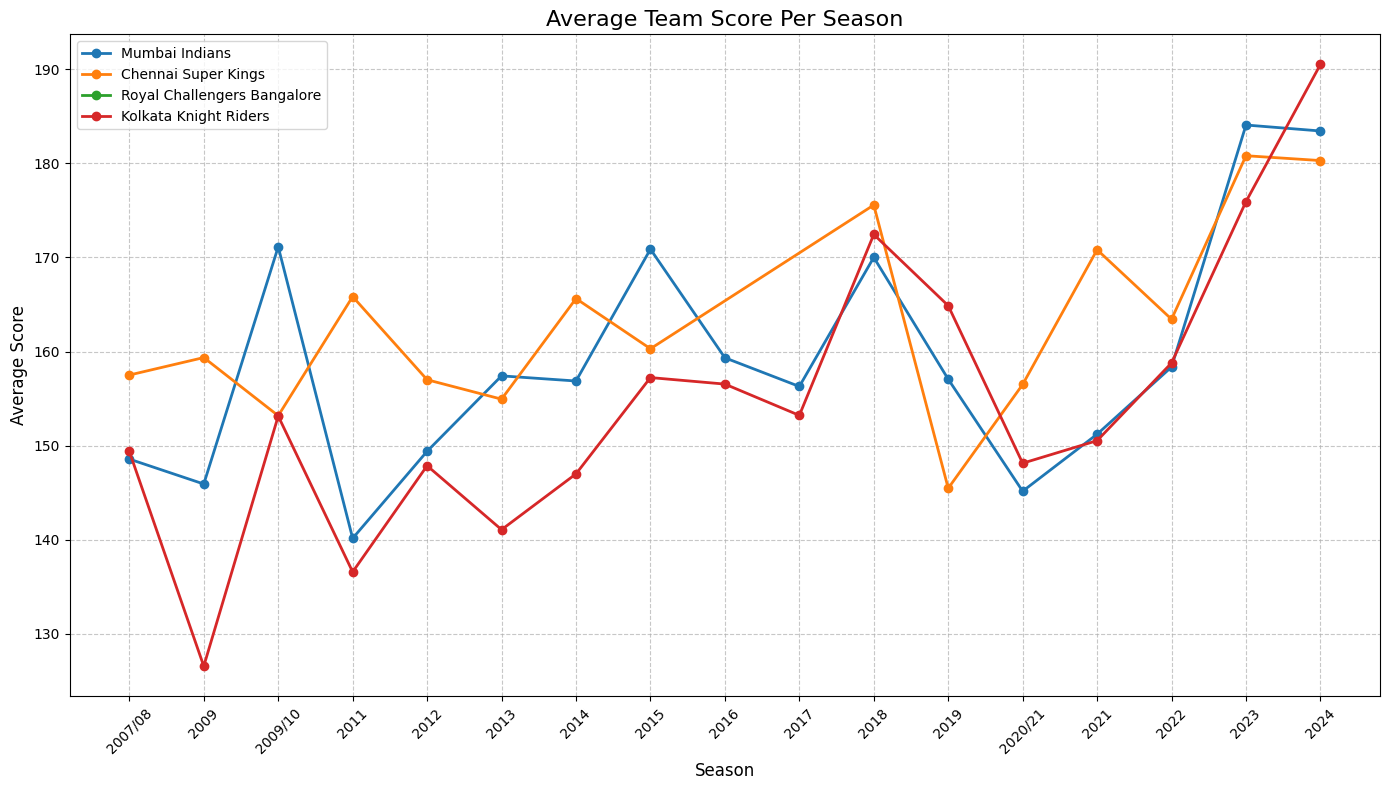

In [ ]:
# Calculate team innings total for each match
team_innings_total = deliveries_df.groupby(['match_id', 'inning', 'batting_team'])['total_runs'].sum().reset_index()

# Merge with matches data to get season information
team_season_scores = team_innings_total.merge(matches_df[['id', 'season']], left_on='match_id', right_on='id')

# Calculate average score for each team per season
avg_team_score_per_season = team_season_scores.groupby(['season', 'batting_team'])['total_runs'].mean().reset_index()

# Visualize for selected teams
plt.figure(figsize=(14, 8))
top_teams = ['Mumbai Indians', 'Chennai Super Kings', 'Royal Challengers Bangalore', 'Kolkata Knight Riders']
for team in top_teams:
    team_data = avg_team_score_per_season[avg_team_score_per_season['batting_team'] == team]
    plt.plot(team_data['season'], team_data['total_runs'], marker='o', linewidth=2, label=team)

plt.title('Average Team Score Per Season', fontsize=16)
plt.xlabel('Season', fontsize=12)
plt.ylabel('Average Score', fontsize=12)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Analyzing runs of Orange Cap Holders per season

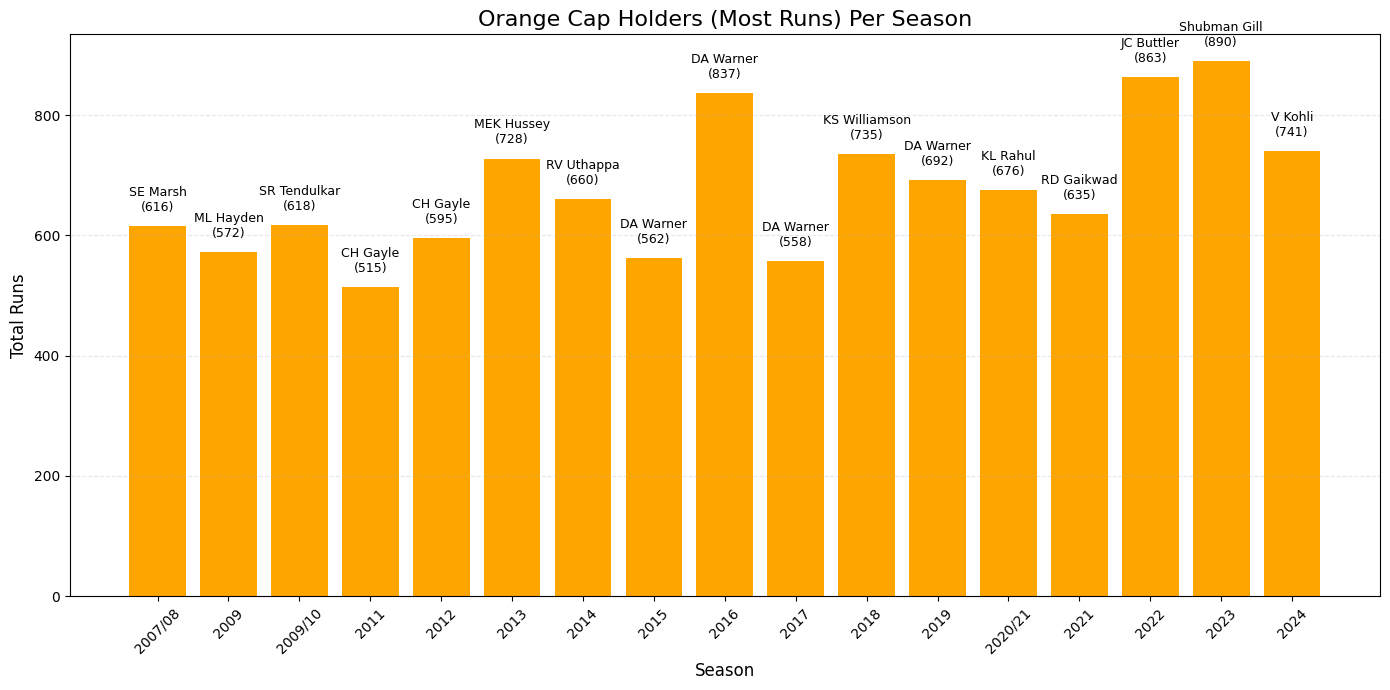

In [ ]:
# Calculate total runs for each batsman per season
batsman_season_runs = deliveries_df.merge(matches_df[['id', 'season']], left_on='match_id', right_on='id')
batsman_season_runs = batsman_season_runs.groupby(['season', 'batter'])['batsman_runs'].sum().reset_index()

# Find the Orange Cap holder for each season (top run-scorer)
orange_cap_holders = batsman_season_runs.loc[batsman_season_runs.groupby('season')['batsman_runs'].idxmax()]
orange_cap_holders = orange_cap_holders.rename(columns={'batsman_runs': 'total_runs'})

# Visualize
plt.figure(figsize=(14, 7))
bars = plt.bar(orange_cap_holders['season'], orange_cap_holders['total_runs'], color='orange')

# Add player names on top of bars
for bar, player, runs in zip(bars, orange_cap_holders['batter'], orange_cap_holders['total_runs']):
    plt.text(bar.get_x() + bar.get_width()/2, runs + 20,
             f"{player}\n({runs})",
             ha='center', va='bottom', rotation=0, fontsize=9)

plt.title('Orange Cap Holders (Most Runs) Per Season', fontsize=16)
plt.xlabel('Season', fontsize=12)
plt.ylabel('Total Runs', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

### Tracking wickets of Purple Cap Holders per season

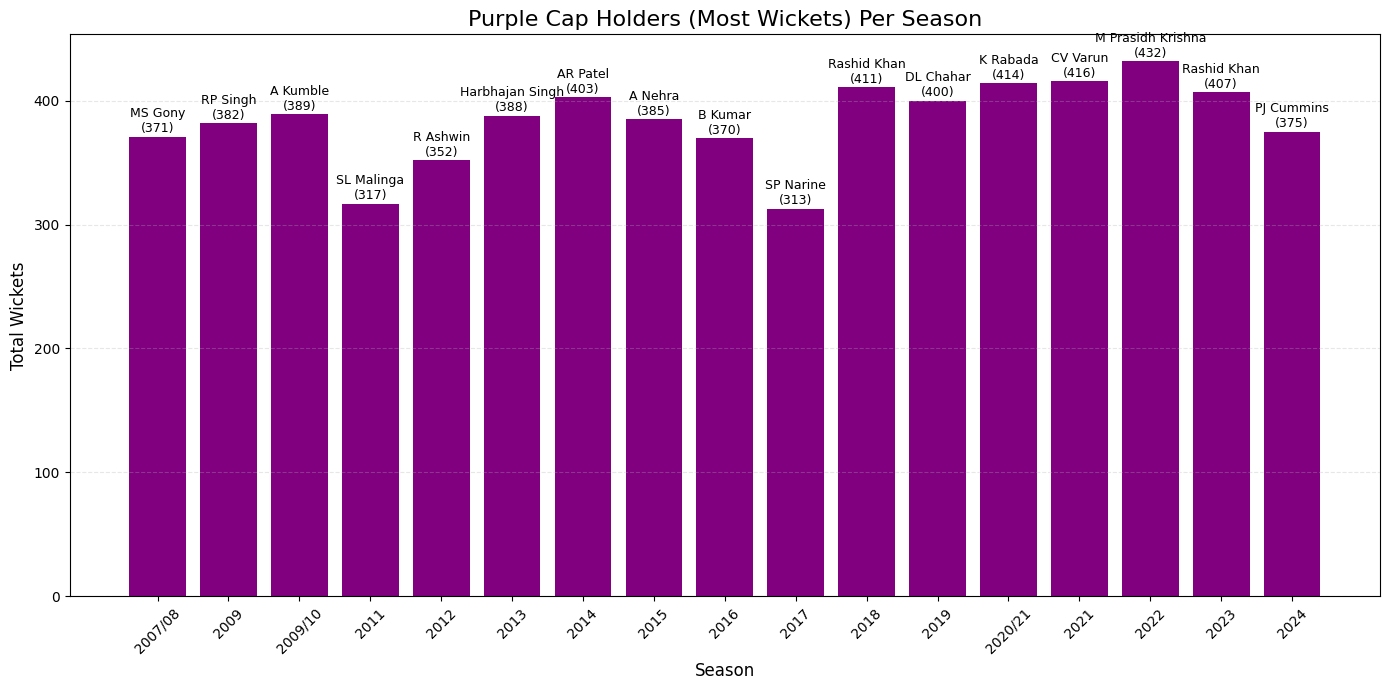

In [ ]:
# Calculate total wickets for each bowler per season
# Consider only player_dismissed events to count wickets
wicket_data = deliveries_df[deliveries_df['player_dismissed'].notna()]
bowler_season_wickets = wicket_data.merge(matches_df[['id', 'season']], left_on='match_id', right_on='id')
bowler_season_wickets = bowler_season_wickets.groupby(['season', 'bowler']).size().reset_index(name='wickets')

# Find the Purple Cap holder for each season (top wicket-taker)
purple_cap_holders = bowler_season_wickets.loc[bowler_season_wickets.groupby('season')['wickets'].idxmax()]

# Visualize
plt.figure(figsize=(14, 7))
bars = plt.bar(purple_cap_holders['season'], purple_cap_holders['wickets'], color='purple')

# Add player names on top of bars
for bar, player, wickets in zip(bars, purple_cap_holders['bowler'], purple_cap_holders['wickets']):
    plt.text(bar.get_x() + bar.get_width()/2, wickets + 1,
             f"{player}\n({wickets})",
             ha='center', va='bottom', rotation=0, fontsize=9)

plt.title('Purple Cap Holders (Most Wickets) Per Season', fontsize=16)
plt.xlabel('Season', fontsize=12)
plt.ylabel('Total Wickets', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

### Finding top 10 bowlers per season

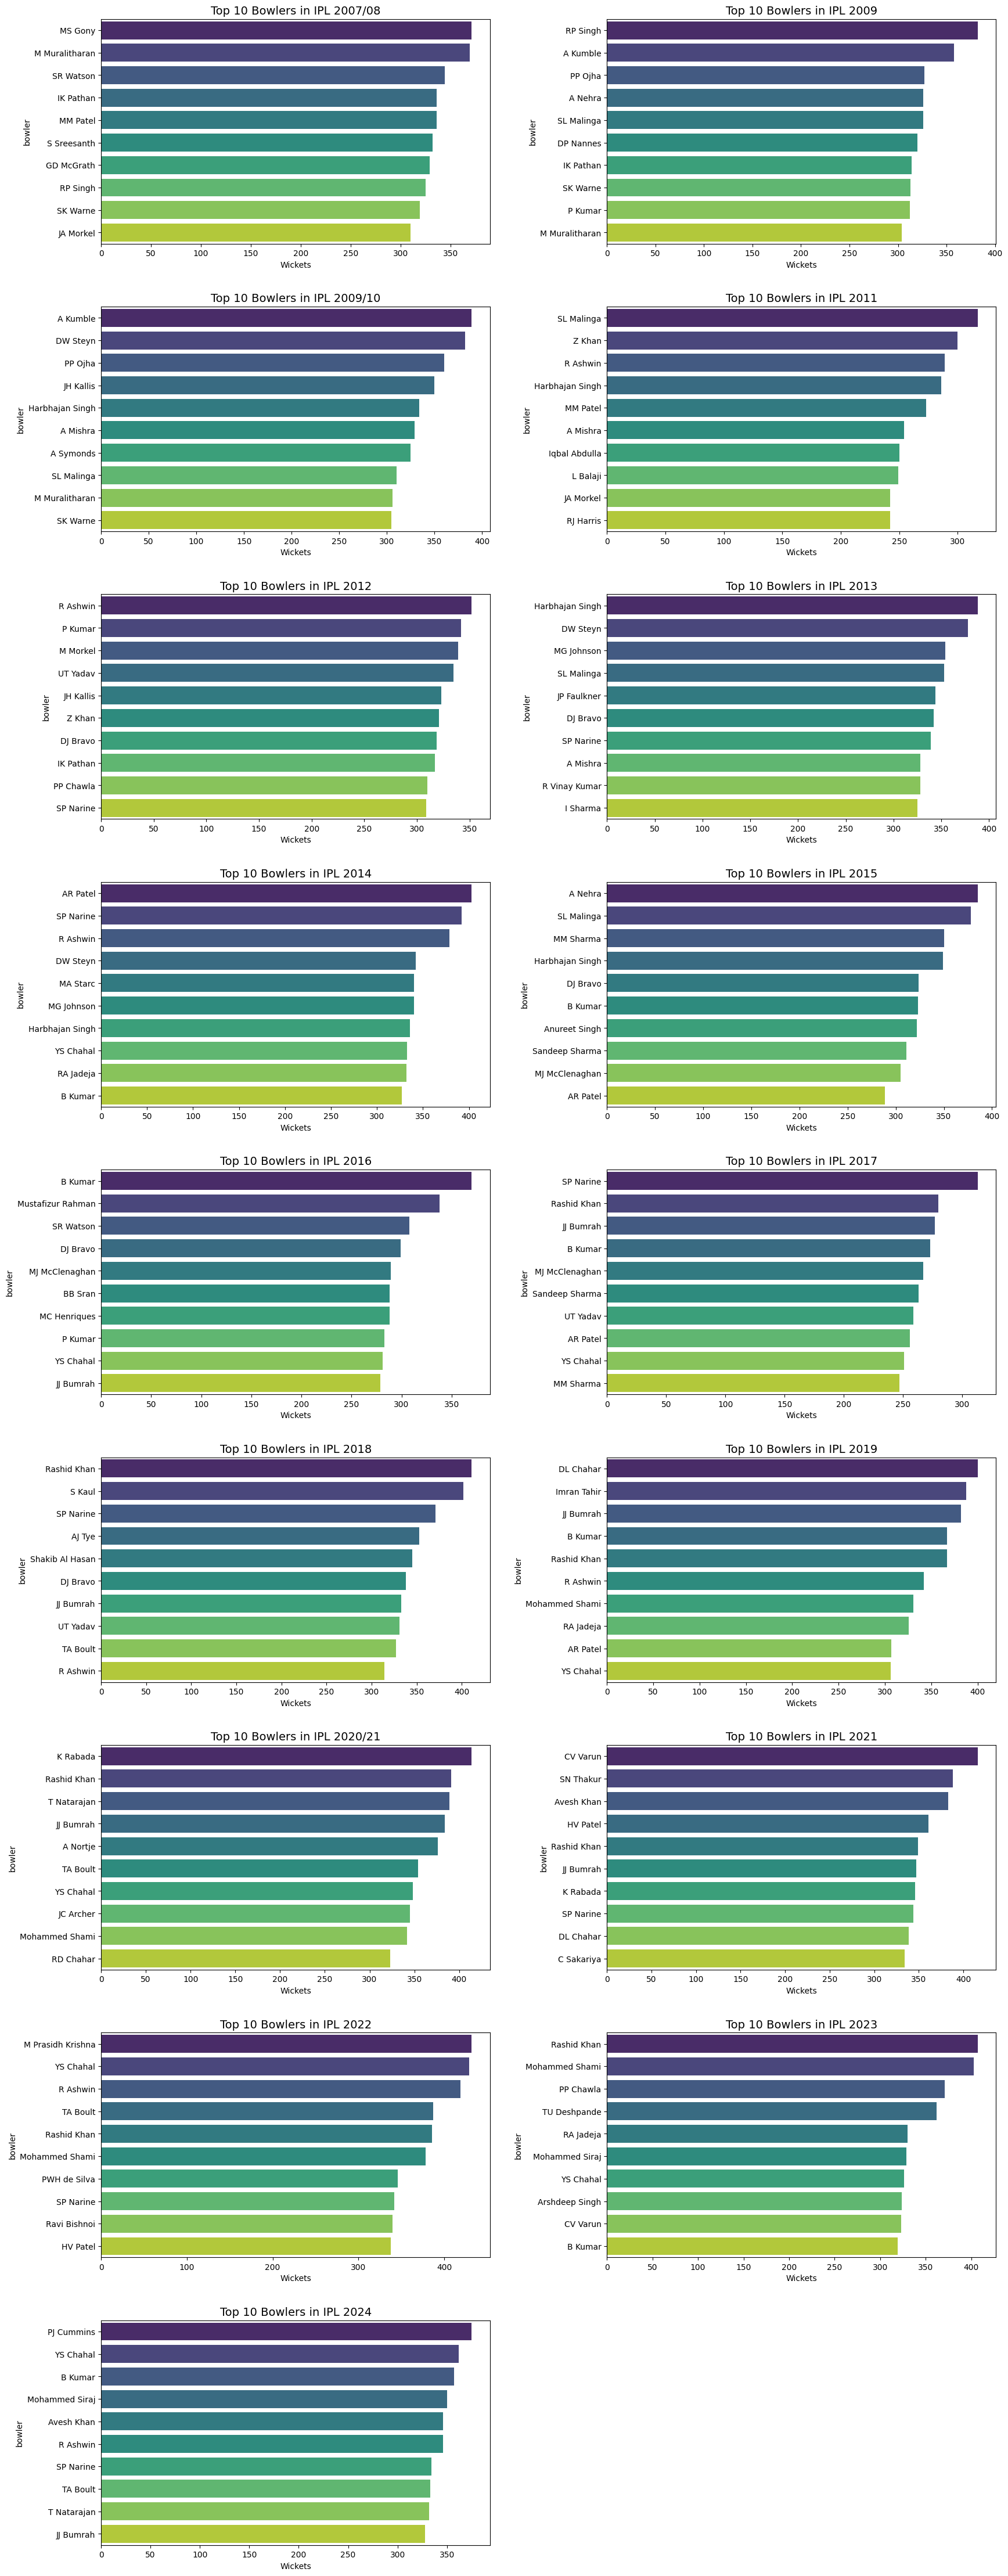

In [ ]:
# Calculate total wickets for each bowler per season
wicket_data = deliveries_df[deliveries_df['player_dismissed'].notna()]
bowler_season_wickets = wicket_data.merge(matches_df[['id', 'season']], left_on='match_id', right_on='id')
bowler_season_wickets = bowler_season_wickets.groupby(['season', 'bowler']).size().reset_index(name='wickets')

# Get top 10 bowlers for each season
seasons = sorted(bowler_season_wickets['season'].unique())
rows = (len(seasons) + 1) // 2  # Calculate rows needed for subplots

plt.figure(figsize=(18, 5*rows))
for i, season in enumerate(seasons):
    season_data = bowler_season_wickets[bowler_season_wickets['season'] == season]
    top10_bowlers = season_data.nlargest(10, 'wickets')

    plt.subplot(rows, 2, i+1)
    sns.barplot(x='wickets', y='bowler', data=top10_bowlers, palette='viridis')
    plt.title(f'Top 10 Bowlers in IPL {season}', fontsize=14)
    plt.xlabel('Wickets', fontsize=10)
    plt.tight_layout()

plt.tight_layout(pad=3.0)
plt.show()

In [ ]:
# Define input (X) and target (y)
X = matches_df.drop(columns=['winner'])  # Drop the target variable
y = matches_df['winner']  # Target column
le = LabelEncoder()
y = le.fit_transform(y)

# Convert categorical variables
X = pd.get_dummies(X)

# Standardize data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

models = {
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "KNN": KNeighborsClassifier(n_neighbors=5)
}

# Feature Clustering Using K-Means
num_clusters = 3  # Adjust based on analysis
kmeans = KMeans(n_clusters=num_clusters, random_state=42, n_init=10)
X['Cluster'] = kmeans.fit_predict(X_scaled)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"{model_name} Accuracy: {acc:.4f}")


Gradient Boosting Accuracy: 0.8259
XGBoost Accuracy: 0.8159
Logistic Regression Accuracy: 0.1244
KNN Accuracy: 0.1244


In [ ]:
# Define base models
gb = GradientBoostingClassifier(n_estimators=100, random_state=42)
xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)

# Voting ensemble
voting_ensemble = VotingClassifier(estimators=[('Gradient Boosting', gb), ('XGBoost', xgb)], voting='soft')

# Train and evaluate ensemble model
voting_ensemble.fit(X_train, y_train)
y_pred = voting_ensemble.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f"Voting Ensemble Accuracy: {acc:.4f}")


Voting Ensemble Accuracy: 0.8507
